In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
from PIL import Image
np.random.seed(seed=1)

In [2]:
# Parameters
n = 100 # Number of rows
Lambda = 0 # Regularisation parameter
alpha = 1 # Noise variance
sigma = 1 # Theta's variance
col1 = 0.005 # Value of the odd columns for Alternated Columns Variance profile
col2 = 1 # Value of the even columns for Alternated Columns Variance profile

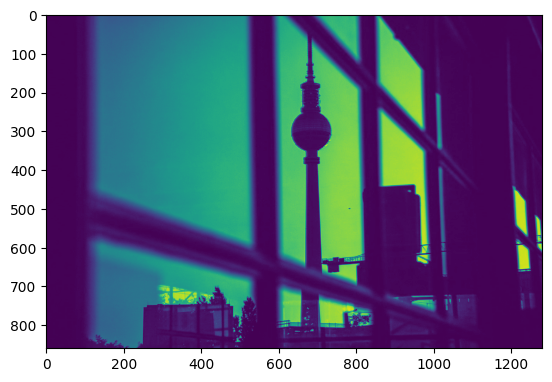

In [3]:
# Berlin photo
img = Image.open('berlin.jpg')
numpydata = np.asarray(img)
Gamma_img = numpydata[:,:,1]
plt.imshow(Gamma_img[:,:])

In [4]:
ratio_dim = np.linspace(0.1,6,80)
ratios_final = [] # List of the ratios n/p 
Equivalent_risk_image = [] # List of deterministic equivalent for various ratios p/n in the case of a Constant Berlin Photo profile
Equivalent_risk_col = [] # List of deterministic equivalent for various ratios p/n in the case of a Alternated Columns Variance profile


Risk_image = [] # List of predictive risk for various ratios p/n in the case of a Berlin Photo Variance profile
Risk_col = [] # List of predictive risk for various ratios p/n in the case of a Alternated Columns Variance profile

for r in ratio_dim:
  p = int(n*r) # Number of columns

  #Choice of the Variance profile
  img_resized = img.resize((p,n))
  Gamma_image = np.asarray(img_resized)[:,:,1]
  Gamma_image = (Gamma_image/(np.sum(np.abs(Gamma_image))))*p*n # Berlin Photo Variance profile for the training set
  Gamma_col = utils.variance_profile('alternate_column', n, p, col1 = col1, col2 = col2) # Alternated Columns Variance profile for the training set

  Gamma_image_test =  np.array([Gamma_img[n+1,0:p]])
  Gamma_image_test = (Gamma_image_test/(np.sum(np.abs(Gamma_image_test))))*p# Berlin Photo Variance profile for the test set
  Gamma_col_test = utils.variance_profile('alternate_column', 1, p, col1 = col1, col2 = col2) # Alternated Columns Variance profile for the test set

  if p != n: # If n=p the predictive risk is not defined, thus we avoid this situation
    ratios_final.append(r)
    risk_image, equivalent_risk_image, _ = utils.R_ts(Lambda, Gamma_image, Gamma_image_test, n, p, alpha = alpha, sig = sigma) # Predictive risk and Deterministic equivalent for the Berlin Photo Variance profile
    risk_col, equivalent_risk_col, _ = utils.R_ts(Lambda, Gamma_col, Gamma_col_test, n, p, alpha = alpha, sig = sigma) # Predictive risk and Deterministic equivalent for the Quasi Alternated Columns Variance profile

    Equivalent_risk_image.append(equivalent_risk_image)
    Equivalent_risk_col.append(equivalent_risk_col)
    
    Risk_image.append(risk_image)
    Risk_col.append(risk_col)

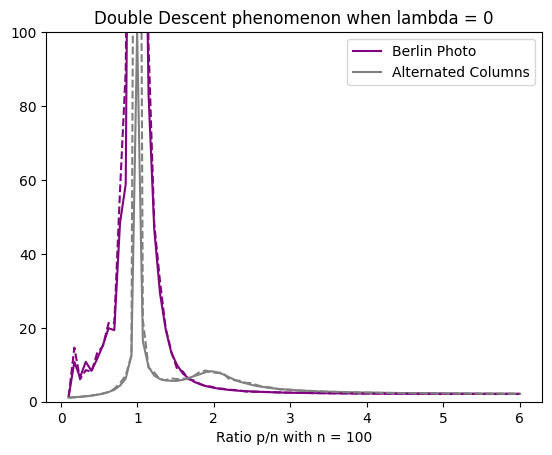

In [5]:
fig, ax = plt.subplots()
ax.plot(ratios_final, Equivalent_risk_image, color = 'purple')
ax.plot(ratios_final, Equivalent_risk_col, color = 'grey')

ax.plot(ratios_final, Risk_image, '--', color = 'purple')
ax.plot(ratios_final, Risk_col, '--', color = 'grey')

plt.legend(["Berlin Photo", "Alternated Columns"])
plt.xlabel("Ratio p/n with n = 100")
plt.title("Double Descent phenomenon when lambda = 0")
plt.ylim(0,100)
plt.show()

In [6]:
n = 300 # Number of rows

ratio_dim = np.linspace(0.1,6,50) # Ratios p/n
eig_image = [] # List of Smallest non-zero eigenvalue of the covariance matrix for various ratios p/n in the case of the Berlin Photo Variance profile
eig_col = [] # List of Smallest non-zero eigenvalue of the covariance matrix for various ratios p/n in the case of the Alternated Columns Variance profile

for r in ratio_dim:
  p = int(n*r) # Number of columns
  print(p)
  img_resized = img.resize((p,n))
  Gamma_image = np.asarray(img_resized)[:,:,1]
  Gamma_image = (Gamma_image/(np.sum(np.abs(Gamma_image))))*p*n # Berlin Photo Variance profile
  X_image = np.sqrt(Gamma_image) * np.random.normal(0,1,size = (n,p)) # Data matrix with a Berlin Photo Variance profile
  eig_image.append(max(np.real(np.min(np.linalg.eigvals((X_image @ X_image.T)/n))), np.real(np.min(np.linalg.eigvals(X_image.T @ X_image/n)))))
    
  Gamma_col = utils.variance_profile('alternate_column', 1, p, col1 = col1, col2 = col2) # Alternated Columns Variance profile
  X_col = np.sqrt(Gamma_col) * np.random.normal(0,1,size = (n,p)) # Data matrix with a Alternated Columns Variance profile
  eig_col.append(max(np.real(np.min(np.linalg.eigvals((X_col @ X_col.T)/n))), np.real(np.min(np.linalg.eigvals(X_col.T @ X_col/n)))))

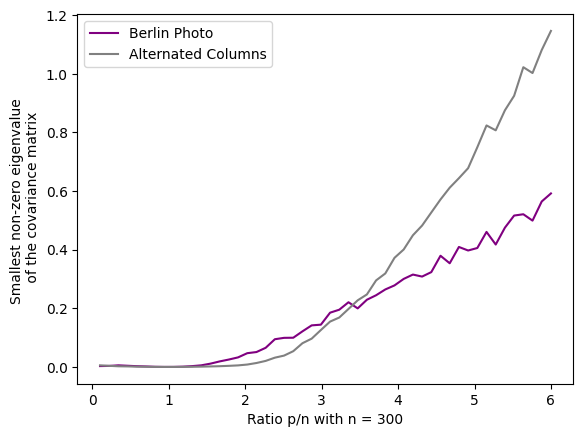

In [7]:
plt.plot(ratio_dim,eig_image, color = 'purple')
plt.plot(ratio_dim,eig_col, color = 'grey')
plt.xlabel("Ratio p/n with n = 300")
plt.ylabel("Smallest non-zero eigenvalue \n of the covariance matrix")
plt.legend(["Berlin Photo", "Alternated Columns"])